In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from models import MLP, ResNet18, Net
from optimizers import sgdm, fgsmm
from utils_train import get_data_loaders, train, train_at, train_alp, train_atpx, train_ara, train_arapx, test, get_data_loaders_cifar

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
seed = 0 # Set the random seed, so the experiment is reproducible
torch.manual_seed(seed)
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = 32 # We use a batch size of 32 examples while training, and 1000 while testing
test_batch_size = 1000
momentum = 0.5 # We will use SGD with a momentum term
lr = 0.01 # The learning rate
epochs = 5 # The number of epochs
im_size = 28*28 # The size of the input. MNIST are greyscale images, 28x28 pixels each

In [3]:
train_loader, test_loader = get_data_loaders(batch_size, test_batch_size)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ../data/KMNIST/raw/train-images-idx3-ubyte.gz to ../data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ../data/KMNIST/raw/train-labels-idx1-ubyte.gz to ../data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ../data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ../data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/KMNIST/raw



/home/victor/miniconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
model = MLP(im_size).to(device)
#model = ResNet18().to(device)
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr,
                      momentum=momentum)

In [5]:
training_losses = []
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch, training_losses)
    test(model, device, test_loader)

/home/victor/ARA-for-AT/models.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.347875
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.439765

Test set: Average loss: 0.6849, Accuracy: 7863/10000 (79%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.308425
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.135377

Test set: Average loss: 0.5961, Accuracy: 8175/10000 (82%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.228807
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.300009

Test set: Average loss: 0.5342, Accuracy: 8405/10000 (84%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.251369
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.069124

Test set: Average loss: 0.5347, Accuracy: 8424/10000 (84%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.237378
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.259377

Test set: Average loss: 0.4993, Accuracy: 8545/10000 (85%)



In [6]:
torch.save(model.state_dict(), 'mlp.bin')

In [7]:
model = MLP(im_size).to(device)
model.load_state_dict(torch.load('mlp.bin'))

<All keys matched successfully>

## Training with AT

In [8]:
model_at = MLP(im_size).to(device)
optimizer = optim.SGD(model_at.parameters(), lr=lr, momentum=momentum)

In [9]:
train = True
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train_at(model_at, device, train_loader, optimizer, epoch, training_losses)
        #test(model, device, test_loader)
test(model_at, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.511095
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.523501
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.481621
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.396906
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.586389
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.602334
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.082016
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.334321
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.271904
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.536783

Test set: Average loss: 0.4927, Accuracy: 8514/10000 (85%)



In [10]:
torch.save(model_at.state_dict(), 'mlp_at.bin')

In [11]:
model_at = MLP(im_size).to(device)
model_at.load_state_dict(torch.load('mlp_at.bin'))

<All keys matched successfully>

In [4]:
model_atpx = MLP(im_size).to(device)
optimizer = optim.SGD(model_atpx.parameters(), lr=lr, momentum=momentum)

train = True
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train_atpx(model_atpx, device, train_loader, optimizer, epoch, training_losses)
        #test(model, device, test_loader)
test(model_atpx, device, test_loader)


/home/victor/sandbox/sgmcmc4ara/models.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.505699
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.821072
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.388468
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.383399
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.391831
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.485502
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.360737
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.351221
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.423970
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.508609

Test set: Average loss: 0.1561, Accuracy: 9568/10000 (96%)



<All keys matched successfully>

In [10]:
#torch.save(model_atpx.state_dict(), 'mlp_atpx.bin')
model_atpx = MLP(im_size).to(device)
model_atpx.load_state_dict(torch.load('mlp_atpx.bin'))

<All keys matched successfully>

## Training with ARAAT

In [12]:
model_ara = MLP(im_size).to(device)
optimizer = optim.SGD(model_ara.parameters(), lr=lr,
                      momentum=momentum)

In [13]:
train = True
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train_ara(model_ara, device, train_loader, optimizer, epoch, training_losses)
        test(model_ara, device, test_loader)
test(model_ara, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.806077
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.871075

Test set: Average loss: 0.8152, Accuracy: 7465/10000 (75%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.202377
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.277071

Test set: Average loss: 0.7230, Accuracy: 7753/10000 (78%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.088133
Train Epoch: 3 [32000/60000 (53%)]	Loss: 1.359851

Test set: Average loss: 0.6427, Accuracy: 8047/10000 (80%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.797532
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.237829

Test set: Average loss: 0.6328, Accuracy: 8076/10000 (81%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.541822
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.811413

Test set: Average loss: 0.6100, Accuracy: 8132/10000 (81%)


Test set: Average loss: 0.6100, Accuracy: 8132/10000 (81%)



In [14]:
torch.save(model_ara.state_dict(), 'mlp_ara.bin')

model_ara = MLP(im_size).to(device)
model_ara.load_state_dict(torch.load('mlp_ara.bin'))

<All keys matched successfully>

In [23]:
model_arapx = MLP(im_size).to(device)
optimizer = optim.SGD(model_arapx.parameters(), lr=lr,
                      momentum=momentum)

train = True
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train_arapx(model_arapx, device, train_loader, optimizer, epoch, training_losses)
        #test(model, device, test_loader)
test(model_arapx, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.881540
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.260510
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.836234
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.972818
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.755743
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.866388
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.699592
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.781259
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.753318
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.529514

Test set: Average loss: 0.5353, Accuracy: 8171/10000 (82%)



In [24]:
torch.save(model_arapx.state_dict(), 'mlp_arapx.bin')

model_arapx = MLP(im_size).to(device)
model_arapx.load_state_dict(torch.load('mlp_arapx.bin'))

<All keys matched successfully>

## Training with ALP

In [6]:
model_alp = MLP(im_size).to(device)
optimizer = optim.SGD(model_alp.parameters(), lr=lr,
                      momentum=momentum)

train = True
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train_alp(model_alp, device, train_loader, optimizer, epoch, training_losses)
        #test(model, device, test_loader)
test(model_alp, device, test_loader)

/home/victor/sandbox/sgmcmc4ara/models.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.468363
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.462306
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.411466
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.509002
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.379494
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.284056
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.256590
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.509348
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.234332
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.360451

Test set: Average loss: 0.1593, Accuracy: 9616/10000 (96%)



In [7]:
torch.save(model_alp.state_dict(), 'mlp_alp.bin')

model_alp = MLP(im_size).to(device)
model_alp.load_state_dict(torch.load('mlp_alp.bin'))

<All keys matched successfully>

## Full atack & defense evaluation 

In [17]:
xlim = 0.15
strenghts = np.linspace(0., xlim, 15)

def evaluate_attack(model, strenghts):
    accs = []

    for s in strenghts:

        test_loss = 0
        correct = 0
        model.train()

        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data.requires_grad_(True)
            v = torch.zeros_like(data)
            xv = (data, v)

            def adv_loss(x, y = target):
                return -F.nll_loss(model(x), y)

            xx, mmsgf = fgsmm(adv_loss, xv, T = 5, lr = s, gamma = 0.)
            output = model(xx[0])
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset)

        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))

        accs.append(correct / len(test_loader.dataset))
    return accs


accs = evaluate_attack(model, strenghts)
accs_at = evaluate_attack(model_at, strenghts)
#accs_alp = evaluate_attack(model_alp, strenghts)
#accs_atpx = evaluate_attack(model_atpx, strenghts)
accs_ara = evaluate_attack(model_ara, strenghts)
#accs_arapx = evaluate_attack(model_arapx, strenghts)


Test set: Average loss: 0.4993, Accuracy: 8545/10000 (85%)


Test set: Average loss: 1.1171, Accuracy: 6808/10000 (68%)


Test set: Average loss: 2.2053, Accuracy: 4325/10000 (43%)


Test set: Average loss: 3.7761, Accuracy: 2106/10000 (21%)


Test set: Average loss: 5.6835, Accuracy: 807/10000 (8%)


Test set: Average loss: 7.7402, Accuracy: 264/10000 (3%)


Test set: Average loss: 9.8303, Accuracy: 78/10000 (1%)


Test set: Average loss: 11.8968, Accuracy: 23/10000 (0%)


Test set: Average loss: 13.9251, Accuracy: 5/10000 (0%)


Test set: Average loss: 15.9103, Accuracy: 2/10000 (0%)


Test set: Average loss: 17.8553, Accuracy: 0/10000 (0%)


Test set: Average loss: 19.7735, Accuracy: 0/10000 (0%)


Test set: Average loss: 21.6663, Accuracy: 0/10000 (0%)


Test set: Average loss: 23.5413, Accuracy: 0/10000 (0%)


Test set: Average loss: 25.4012, Accuracy: 0/10000 (0%)


Test set: Average loss: 0.4927, Accuracy: 8514/10000 (85%)


Test set: Average loss: 0.8148, Accuracy: 7505/10000 

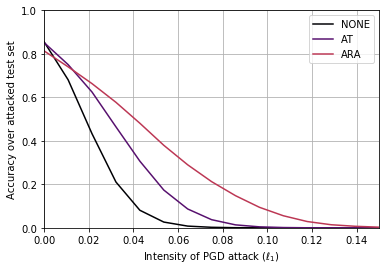

In [18]:
from matplotlib import cm

start = 0.0
stop = .75
number_of_lines = 4
cm_subsection = np.linspace(start, stop, number_of_lines) 

colors = [ cm.inferno(x) for x in cm_subsection ]

plt.plot(strenghts, accs, color=colors[0])
plt.plot(strenghts, accs_at, color=colors[1])
#plt.plot(strenghts, accs_alp, color=colors[2])
#plt.plot(strenghts, accs_atpx, color=colors[3])
plt.plot(strenghts, accs_ara, color=colors[2])
#plt.plot(strenghts, accs_arapx, color=colors[5])
plt.grid(True)
plt.ylim([0., 1.])
#plt.ylim([0.7, 1.])
plt.xlim([0., xlim])
#plt.legend(['NONE', 'AT', 'ALP', 'ATPX', 'ARA', 'ARAPX'])
plt.legend(['NONE', 'AT', 'ARA'])
plt.xlabel('Intensity of PGD attack ($\ell_1$)')
#plt.xlabel('Intensity of FGSM attack')
plt.ylabel('Accuracy over attacked test set')

#plt.savefig('img/comparison_kmnist_fgsm.png', dpi=300)
plt.savefig('img/comparison_kmnist_pgdl1.png', dpi=300)